In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [ ]:
# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df22 = pd.read_fwf('./Dados/COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df23 = pd.read_fwf('./Dados/COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df24 = pd.read_fwf('./Dados/COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df22 = df22[df22['Codigo'].str.endswith('VALE3')]
vale3_df23 = df23[df23['Codigo'].str.endswith('VALE3')]
vale3_df24 = df24[df24['Codigo'].str.endswith('VALE3')]

# Convertendo a coluna 'Data' para datetime
vale3_df22['Data'] = pd.to_datetime(vale3_df22['Data'], format='%Y%m%d')
vale3_df23['Data'] = pd.to_datetime(vale3_df23['Data'], format='%Y%m%d')
vale3_df24['Data'] = pd.to_datetime(vale3_df24['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
vale3_df22['Ano'] = vale3_df22['Data'].dt.year
vale3_df22['Mes'] = vale3_df22['Data'].dt.month
vale3_df22['Dia'] = vale3_df22['Data'].dt.day

vale3_df23['Ano'] = vale3_df23['Data'].dt.year
vale3_df23['Mes'] = vale3_df23['Data'].dt.month
vale3_df23['Dia'] = vale3_df23['Data'].dt.day

vale3_df24['Ano'] = vale3_df24['Data'].dt.year
vale3_df24['Mes'] = vale3_df24['Data'].dt.month
vale3_df24['Dia'] = vale3_df24['Data'].dt.day

In [ ]:
# Concatenando os dataframes de 2022 e 2023
vale3_combined = pd.concat([vale3_df22, vale3_df23])

# Organizando os dados com a data como índice
vale3_combined.set_index('Data', inplace=True)

# Ordenando o índice para garantir que os dados estejam em ordem cronológica
vale3_combined.sort_index(inplace=True)

# Verificando o início e o fim dos dados combinados
print(vale3_combined.index.min())
print(vale3_combined.index.max())

In [ ]:
from pmdarima import auto_arima

# Ajuste do modelo ARIMA sem componente sazonal
modelo_auto = auto_arima(vale3_combined['Preco_Fechamento'], seasonal=False, trace=True)
print(modelo_auto.summary())

In [ ]:
# Ajuste do modelo ARIMA
modelo = ARIMA(vale3_combined['Preco_Fechamento'], order=(0, 1, 2))
modelo_fit = modelo.fit()

# Número de períodos para prever no futuro (12 meses)
n_periods = 12

# Previsão para 2024
previsao = modelo_fit.forecast(steps=n_periods)

# Crie um índice de datas para as previsões de 2024
ultimo_dia_2023 = vale3_combined['Data'].max()
datas_previsao_2024 = pd.date_range(start=ultimo_dia_2023 + pd.DateOffset(days=1), periods=n_periods, freq='D')

# Plotagem dos resultados
plt.figure(figsize=(10, 6))
plt.plot(vale3_combined['Data'], vale3_combined['Preco_Fechamento'], label='Real (2022-2023)')
plt.plot(vale3_df24['Data'], vale3_df24['Preco_Fechamento'], label='Real (2024)')
plt.plot(datas_previsao_2024, previsao, label='Previsão (2024)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento para 2024')
plt.legend()
plt.show()

ADF Statistic: -1.8139708115020359
p-value: 0.3735479642190249


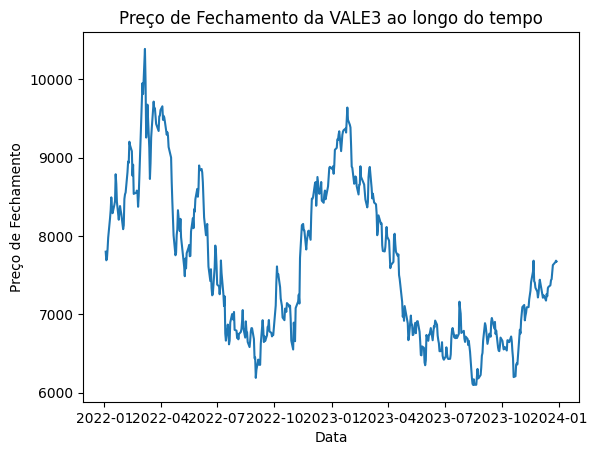

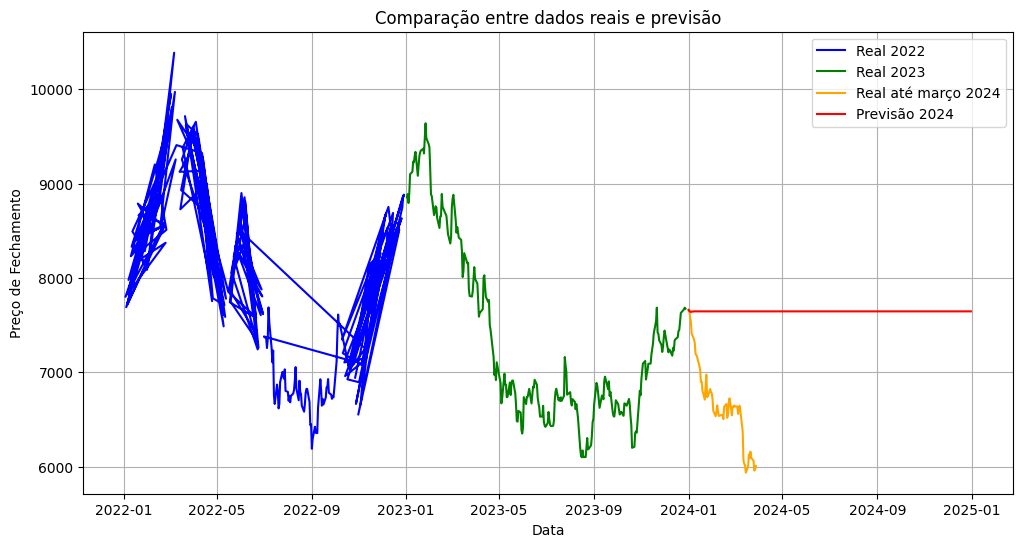

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df22 = pd.read_fwf('./Dados/COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df23 = pd.read_fwf('./Dados/COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df24 = pd.read_fwf('./Dados/COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df22 = df22[df22['Codigo'].str.endswith('VALE3')].copy()
vale3_df23 = df23[df23['Codigo'].str.endswith('VALE3')].copy()
vale3_df24 = df24[df24['Codigo'].str.endswith('VALE3')].copy()

# Convertendo a coluna 'Data' para datetime
vale3_df22['Data'] = pd.to_datetime(vale3_df22['Data'], format='%Y%m%d')
vale3_df23['Data'] = pd.to_datetime(vale3_df23['Data'], format='%Y%m%d')
vale3_df24['Data'] = pd.to_datetime(vale3_df24['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
vale3_df22['Ano'] = vale3_df22['Data'].dt.year
vale3_df22['Mes'] = vale3_df22['Data'].dt.month
vale3_df22['Dia'] = vale3_df22['Data'].dt.day

vale3_df23['Ano'] = vale3_df23['Data'].dt.year
vale3_df23['Mes'] = vale3_df23['Data'].dt.month
vale3_df23['Dia'] = vale3_df23['Data'].dt.day

vale3_df24['Ano'] = vale3_df24['Data'].dt.year
vale3_df24['Mes'] = vale3_df24['Data'].dt.month
vale3_df24['Dia'] = vale3_df24['Data'].dt.day

# Concatenando os dados de 2022 e 2023
vale3_df = pd.concat([vale3_df22, vale3_df23], ignore_index=True)

# Convertendo a coluna 'Data' para datetime na base combinada
vale3_df['Data'] = pd.to_datetime(vale3_df['Data'], format='%Y-%m-%d')

# Ordenando a base combinada por data
vale3_df = vale3_df.sort_values(by='Data').reset_index(drop=True)

# Verificando a estacionaridade dos dados
from statsmodels.tsa.stattools import adfuller

result = adfuller(vale3_df['Preco_Fechamento'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plotando a série temporal
plt.plot(vale3_df['Data'], vale3_df['Preco_Fechamento'])
plt.title('Preço de Fechamento da VALE3 ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show()

# Aplicando diferenciação se necessário
if result[1] > 0.05:
    vale3_df['Preco_Fechamento_Dif'] = vale3_df['Preco_Fechamento'].diff().fillna(0)
else:
    vale3_df['Preco_Fechamento_Dif'] = vale3_df['Preco_Fechamento']

# Fazendo a previsão com ARIMA (5,1,0)
modelo_arima = ARIMA(vale3_df['Preco_Fechamento'], order=(5, 1, 0))
resultado_arima = modelo_arima.fit()

# Fazendo a previsão para o restante de 2024 (de abril a dezembro) dia a dia
# Usamos o método forecast para fazer a previsão de todos os passos de uma vez
forecast_steps = len(previsao_2024_index)
forecast = resultado_arima.forecast(steps=forecast_steps)

# Criando DataFrame com os valores previstos para todos os dias de 2024
previsao_2024_df = pd.DataFrame({'Data': previsao_2024_index, 'Preco_Fechamento_Previsto': forecast})

# Concatenando os dados reais de 2024 até março com a previsão para o restante de 2024
dados_reais_ate_marco = vale3_df24[vale3_df24['Data'] <= '2024-03-31']
previsao_e_dados_reais_2024 = pd.concat([dados_reais_ate_marco, previsao_2024_df], ignore_index=True)

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(vale3_df22['Data'], vale3_df22['Preco_Fechamento'], label='Real 2022', color='blue')
plt.plot(vale3_df23['Data'], vale3_df23['Preco_Fechamento'], label='Real 2023', color='green')
plt.plot(dados_reais_ate_marco['Data'], dados_reais_ate_marco['Preco_Fechamento'], label='Real até março 2024', color='orange')
plt.plot(previsao_e_dados_reais_2024['Data'], previsao_e_dados_reais_2024['Preco_Fechamento_Previsto'], label='Previsão 2024', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação entre dados reais e previsão')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar os dados de 2022, 2023 e 2024
vale3_df22 = pd.read_csv('./Dados/COTAHIST_A2022.TXT', sep=';', header=None, usecols=[0, 1, 2], names=['Data', 'Codigo', 'Fechamento'], encoding='latin-1')
vale3_df23 = pd.read_csv('./Dados/COTAHIST_A2023.TXT', sep=';', header=None, usecols=[0, 1, 2], names=['Data', 'Codigo', 'Fechamento'], encoding='latin-1')
vale3_df24 = pd.read_csv('./Dados/COTAHIST_A2024.TXT', sep=';', header=None, usecols=[0, 1, 2], names=['Data', 'Codigo', 'Fechamento'], encoding='latin-1')

# Concatenar os dados de 2022 e 2023
vale3_df = pd.concat([vale3_df22, vale3_df23], ignore_index=True)

# Converter a coluna 'Data' para datetime
vale3_df['Data'] = pd.to_datetime(vale3_df['Data'], format='%Y%m%d')

# Definir a 'Data' como índice
vale3_df.set_index('Data', inplace=True)

# Visualizar os dados
plt.figure(figsize=(10, 6))
plt.plot(vale3_df.index, vale3_df['Fechamento'], label='Fechamento')
plt.title('Preço de Fechamento da VALE3 ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

# Decompor os dados para verificar a tendência e a sazonalidade
decomposition = sm.tsa.seasonal_decompose(vale3_df['Fechamento'], model='additive', period=252)  # Periodo de 252 dias por ano
fig = decomposition.plot()
plt.show()

# Verificar a autocorrelação dos dados
sm.graphics.tsa.plot_acf(vale3_df['Fechamento'], lags=40)
plt.show()

# Ajustar o modelo ARIMA
modelo_arima = sm.tsa.ARIMA(vale3_df['Fechamento'], order=(5,1,0))  # Ajustar um modelo ARIMA(5,1,0)
resultado_arima = modelo_arima.fit()

# Fazer a previsão para 2024
previsao_2024 = resultado_arima.predict(start='2024-01-01', end='2024-09-30', typ='levels')

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(vale3_df.index, vale3_df['Fechamento'], label='Dados Reais 2022-2023', color='blue')
plt.plot(previsao_2024.index, previsao_2024, label='Previsão 2024', color='red')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação entre dados reais de 2022-2023 e previsão para 2024')
plt.legend()
plt.grid(True)
plt.show()


ParserError: Too many columns specified: expected 3 and found 1